# Clustering Dimension

In this notebook, we will review different techniques to decide the number of clusters in our unsupervised model. Notice however that some of these methods will be also aplicable to general other type of models. 

In [9]:
# Data processing 
import pandas as pd

# Dataset
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Elbow Method

The elbow method is the most widely used method for choosing the number of clusters. It runs clustering models for a range of cluster numbers and plots the within cluster sum of squares. The elbow on the plot shows the point where the diminishing returns for additional clusters happen.

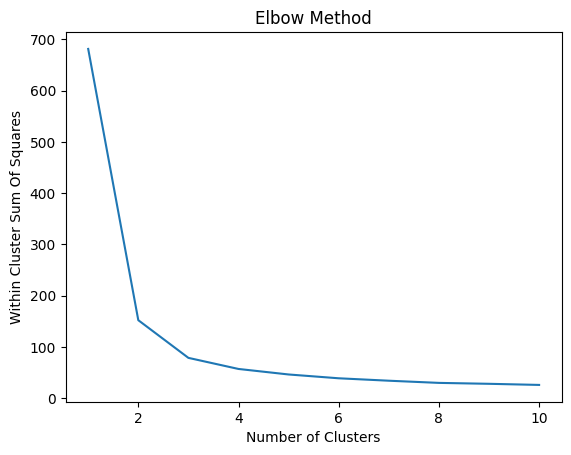

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Create an empty dictionary to save the within cluster sum of square values
wcss = {} 


# Look through the number of clusters
for i in range(1,11):
    # Run kmeans model
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    #Sum of squared distances of samples to their closest cluster center.
    wcss[i] = (kmeans.inertia_)


# Visualization
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum Of Squares')
plt.show()

From the visualization, we can see that the biggest decrease in within cluster sum of squares happens at 2 clusters, and there is a relatively large decrease from 2 to 3 clusters. The decreases are small for the models with the number of clusters greater than 3. Therefore, we can conclude that the optimal number of clusters is probably 2 or 3.

## Silhouette Score

The silhouette score measures how similar a data point is to its own cluster compared to the closest neighbor cluster. The silhouette ranges from −1 to +1.

- The best value is 1, and a value close to 1 means that the sample’s distance to the nearest neighbor cluster is much larger than the intra-cluster distance.
- 0 indicate overlapping clusters
- The worst value is -1, and a value close to -1 means that the sample is assigned to the wrong cluster.

Note that Silhouette Coefficient is only defined if the number of clusters is at least 2 and at most the number of samples minus 1.

The Silhouette score of the model is the average Silhouette value of all samples.

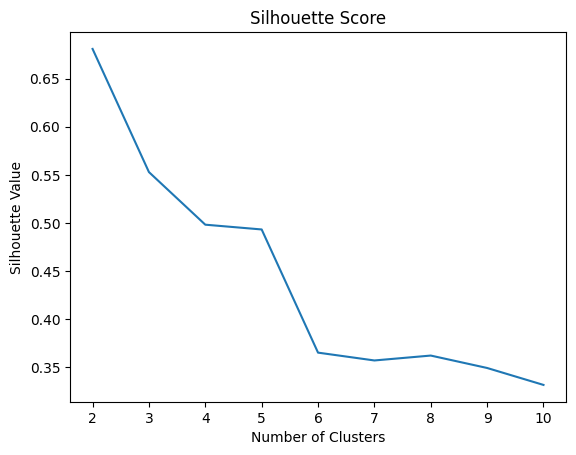

In [5]:
from sklearn.metrics import silhouette_score

# Create an empty dictionary for the Silhouette score
s_score = {} 

# Loop through the number of clusters
for i in range(2,11): # Note that the minimum number of clusters is 2
  # Fit kmeans clustering model for each cluster number
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  # Make prediction
  classes = kmeans.predict(X)
  # Calculate Silhouette score
  s_score[i] = (silhouette_score(X, classes)) 
    
# Visualization
plt.plot(list(s_score.keys()),list(s_score.values()))
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.show()

From the visualization, we can see that the model with 2 clusters has the highest value of Silhouette score, and the model with 3 clusters has the 2nd highest value, so we get the consistent result that there are 2 or 3 clusters.

## Hierarchical Graph

The use of a hierarchical graph can help us find an appropriate number of clusters for our model. In this method, the vertical axis axis represents the euclidean distance, so the longer the vertical line is, the larger distance between the clusters. Thus, following the same reasoning as for the elbow method, we can use the intuition to decide the step in which the vertical distances start to be small enough not to represent a meaningful change.

Text(0, 0.5, 'Euclidean Distance')

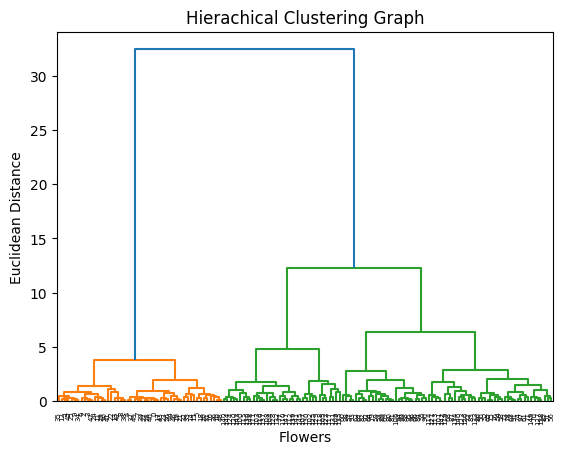

In [4]:
import scipy.cluster.hierarchy as hier

# Fit the hierachical graph
heirachical_graph=hier.dendrogram(hier.linkage(X, method='ward')) #method='ward' uses the Ward variance minimization algorithm# Add titles and labels
plt.title('Hierachical Clustering Graph')
plt.xlabel('Flowers')
plt.ylabel('Euclidean Distance')

From the graph, we can see that the two clusters connected by the blue line have the largest distance, and the two sub-clusters in red have a relatively large distance too. Therefore, the hierarchical graph suggests 2 or 3 clusters as well.

## Akaike Information Criterion (AIC)
 
The Akaike Information Criterion is a general metric for **any** ML model that measure the relative prediction errors of different models. The lower the value, the better the model.

It takes into account the overall error, while penalising the excess of features. In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting. 

 Let $k$ be the number of estimated parameters in the model. Let $\hat L$ be the maximized value of the likelihood function for the model. Then the AIC value of the model is the following.

$${\displaystyle \mathrm {AIC} \,=\,2k-2\ln({\hat {L}})}$$

Given a set of candidate models for the data, the preferred model is the one with the minimum AIC value. Thus, AIC rewards goodness of fit (as assessed by the likelihood function), but it also includes a penalty that is an increasing function of the number of estimated parameters. The penalty discourages overfitting, which is desired because increasing the number of parameters in the model almost always improves the goodness of the fit. 

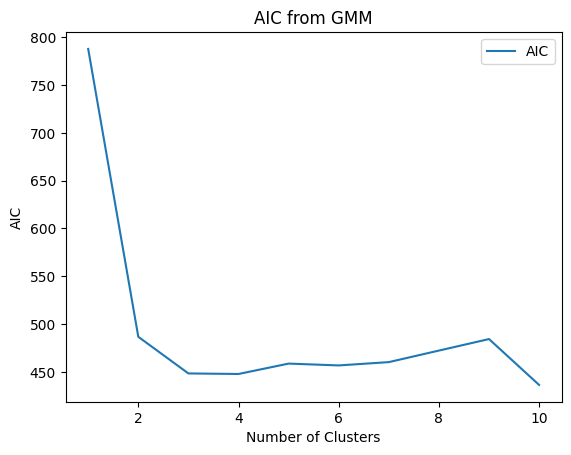

In [11]:
from sklearn.mixture import GaussianMixture

# Create empty dictionary for AIC
aic_score = {} 

# Loop through different number of clusters
for i in range(1,11): 
    # Create Gaussian Mixture Model
    gmm = GaussianMixture(n_components=i, random_state=0).fit(X)
                                                            
    # Get AIC score for the model
    aic_score[i] = gmm.aic(X)
                                                            

plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.legend(loc='best')
plt.title('AIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC')
plt.show()

From the visualization, we can see that AIC has the smallest value at 3 clusters. Although the AIC value for 10 clusters is smaller, the difference between 3 clusters and 10 clusters is quite small. In this case, we will choose a simpler model with 3 clusters.

## Bayesian Information Criterion

The formula for the Bayesian information criterion (BIC) is similar to the formula for AIC, but with a different penalty for the number of parameters. With AIC the penalty is $2k$, whereas with BIC the penalty is $log(n)k$.

Several authors have studied the differences between AIC and BIC. It can be shown that AIC/AICc can be derived in the same Bayesian framework as BIC, just by using different prior probabilities. In the Bayesian derivation of BIC, though, each candidate model has a prior probability of 1/R (where R is the number of candidate models). Additionally, some studies that suggest AICc tends to have practical/performance advantages over BIC, while BIC seems to have the best infinity limit (it guarantees that you would find the "true model" under the necessary conditions).


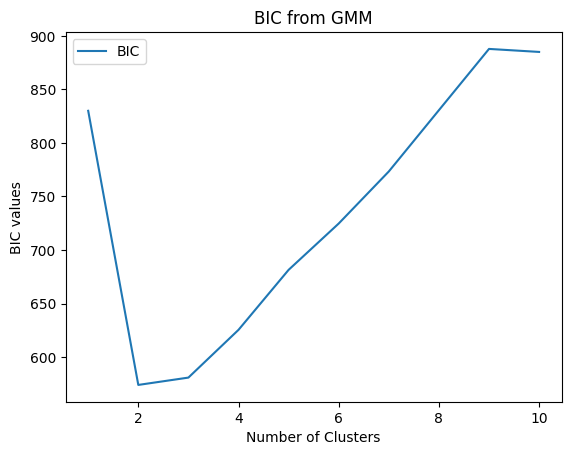

In [12]:
# Create empty dictionary for BIC values
bic_score = {}

# Loop through different number of clusters
for i in range(1,11): 
    # Create Gaussian Mixture Model
    gmm = GaussianMixture(n_components=i, random_state=0).fit(X)

    # Get BIC score for the model
    bic_score[i] = gmm.bic(X)

# Visualization
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC values')
plt.show()

BIC has the smallest value at the 2-cluster model, and the 3-cluster model has a similar value, suggesting that the optimal number of clusters is 2 or 3.